In [1]:
from argparse import Namespace
from prafa.universe import Universe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

import pickle

In [4]:
filepath = 'results/portfolio_sp500_lagrange_full_30.json'
with open(filepath, 'rb') as f:
    portfolios = pickle.load(f)


Removed 3 columns due to too many missing values.
Removed 1 rows due to missing values.
Removed 1 columns due to too many missing values.
Removed 0 rows due to missing values.
Removed 6 columns due to too many missing values.
Removed 4 rows due to missing values.
Removed 8 columns due to too many missing values.
Removed 4 rows due to missing values.
Removed 13 columns due to too many missing values.
Removed 8 rows due to missing values.
Removed 7 columns due to too many missing values.
Removed 0 rows due to missing values.
Removed 6 columns due to too many missing values.
Removed 10 rows due to missing values.
Removed 7 columns due to too many missing values.
Removed 1 rows due to missing values.
Removed 5 columns due to too many missing values.
Removed 0 rows due to missing values.
Removed 8 columns due to too many missing values.
Removed 6 rows due to missing values.
Removed 3 columns due to too many missing values.
Removed 1 rows due to missing values.
Removed 7 columns due to too m

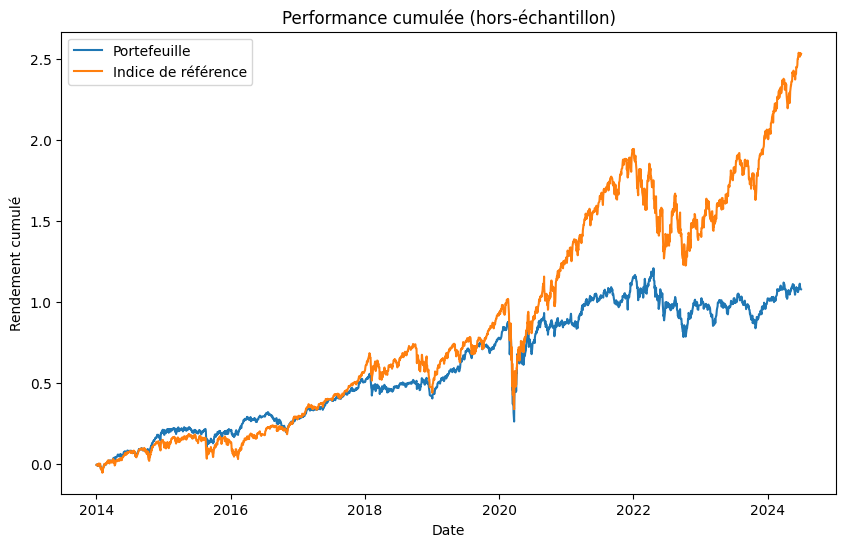

In [5]:

args = Namespace()
args.index = 'sp500'
args.data_path = 'financial_data'
args.result_path = 'results'
args.solution_name = 'lagrange_full'
args.rebalancing = 6  
args.start_date = '2014-01-02'
args.end_date = '2025-01-02'

# Initialiser l'objet Universe
universe = Universe(args)


# S'assurer que les dates sont ordonnées
dates = sorted(list(portfolios.keys()))
n = len(dates)

rendements_portefeuille = []
rendements_indice = []
index_dates = []

for i in range(n - 1):  # On va jusqu'à n-1 car on a besoin de t et t+1
    start_date = dates[i]
    end_date = dates[i + 1] - pd.tseries.offsets.BDay(1)  # veille du prochain rebalance

    # Extraire rendements entre deux rebalancements
    universe.new_universe(start_date, end_date, training=False)
    window_returns = universe.get_stocks_returns()
    weights_dict = portfolios[start_date]
    
    
    rendements_journaliers = []

    # Parcourir chaque date
    for date in window_returns.index:
        rendement_jour = 0
        for stock, weight in weights_dict.items():
            if stock in window_returns.columns:
                r = window_returns.at[date, stock]
            
                rendement_jour += weight * r
        rendements_journaliers.append(rendement_jour)

    ri = universe.get_index_returns().iloc[:, 0].tolist()

    rendements_portefeuille += rendements_journaliers
    rendements_indice += ri
    index_dates += list(window_returns.index)

# Construire les séries temporelles
rendements_portefeuille = pd.Series(rendements_portefeuille, index=index_dates)
rendements_indice = pd.Series(rendements_indice, index=index_dates)

# Cumuler les rendements
rendements_cumules_portefeuille = (rendements_portefeuille + 1).cumprod() -1
rendements_cumules_indice = (rendements_indice + 1).cumprod() - 1

# Tracer
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer les deux courbes
plt.plot(rendements_cumules_portefeuille, label="Portefeuille")
plt.plot(rendements_cumules_indice, label="Indice de référence")

# Ajouter des titres et des labels
plt.title("Performance cumulée (hors-échantillon)")
plt.xlabel("Date")
plt.ylabel("Rendement cumulé")

# Afficher la légende et la grille
plt.legend()

# Afficher le graphique
plt.show()


xd 
 
 
 xd
